In [100]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT4MV-jCI7JZ5glq5YmcLCNs0lrQKb-Nyr63LPmXV9BFpXKsx3JJTx4oa5unSB4tZMwO-UCaG65x96Z/pub?output=csv")

In [3]:
df.head()

,Student ID,School Name,Grade Level,BOY F&P Score,BOY,EOY F&P Score,EOY
0,10000001,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
1,10000002,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
2,10000003,Crown Heights Middle School,5,11.0,Below Proficient,16.0,Advanced
3,10000004,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
4,10000005,Bushwick Middle School,5,11.0,Below Proficient,14.0,Proficient


In [4]:
df.shape

(376, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 7 columns):
Student ID       376 non-null int64
School Name      376 non-null object
Grade Level      376 non-null int64
BOY F&P Score    279 non-null float64
BOY              278 non-null object
EOY F&P Score    366 non-null float64
EOY              366 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 20.6+ KB


In [6]:
df.describe()

,Student ID,Grade Level,BOY F&P Score,EOY F&P Score
count,3.760000e+02,376.000000,279.000000,366.000000
mean,1.000019e+07,5.529255,12.867384,16.390710
std,1.083334e+02,0.499808,2.572750,3.057946
min,1.000000e+07,5.000000,0.000000,9.000000
25%,1.000009e+07,5.000000,11.000000,14.000000
50%,1.000019e+07,6.000000,13.000000,16.000000
75%,1.000028e+07,6.000000,14.000000,19.000000
max,1.000038e+07,6.000000,21.000000,33.000000


In [200]:
df.isnull().sum()

Student ID       0
School_Name      0
Grade_Level      0
BOY_FP_Score    97
BOY             98
EOY_FP_Score    10
EOY             10
dtype: int64

In [9]:
df = df.rename(columns={'BOY F&P Score':'BOY_FP_Score', 'EOY F&P Score':'EOY_FP_Score', 'Grade Level':'Grade_Level', 'School Name':'School_Name'})

# DATA FRAME 2 (REMOVE ALL NULL VALUES)

In [10]:
df2 = df.dropna()
df2.describe(include="all")

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
count,2.680000e+02,268,268.000000,268.000000,268,268.000000,268
unique,NaN,2,NaN,NaN,4,NaN,4
top,NaN,Bushwick Middle School,NaN,NaN,Proficient,NaN,Advanced
freq,NaN,180,NaN,NaN,94,NaN,108
mean,1.000017e+07,NaN,5.406716,12.947761,NaN,15.712687,NaN
std,1.071991e+02,NaN,0.492140,2.476306,NaN,2.852738,NaN
min,1.000000e+07,NaN,5.000000,7.000000,NaN,9.000000,NaN
25%,1.000007e+07,NaN,5.000000,11.000000,NaN,14.000000,NaN
50%,1.000015e+07,NaN,5.000000,13.000000,NaN,15.500000,NaN
75%,1.000025e+07,NaN,6.000000,14.000000,NaN,18.000000,NaN


In [11]:
df2.isnull().sum()

Student ID      0
School_Name     0
Grade_Level     0
BOY_FP_Score    0
BOY             0
EOY_FP_Score    0
EOY             0
dtype: int64

In [12]:
df2.shape

(268, 7)

In [13]:
df2.School_Name.value_counts()

Bushwick Middle School         180
Crown Heights Middle School     88
Name: School_Name, dtype: int64

In [14]:
df2.EOY.value_counts()

Advanced            108
Proficient           90
Below Proficient     48
Remedial             22
Name: EOY, dtype: int64

In [15]:
df2.BOY.value_counts()

Proficient          94
Below Proficient    76
Advanced            70
Remedial            28
Name: BOY, dtype: int64

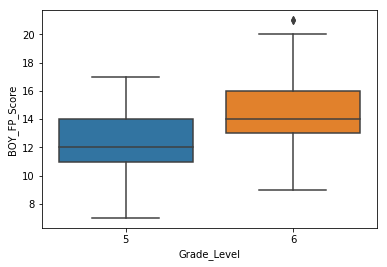

In [116]:
ax = sns.boxplot(x="Grade_Level", y="BOY_FP_Score", data=df2)

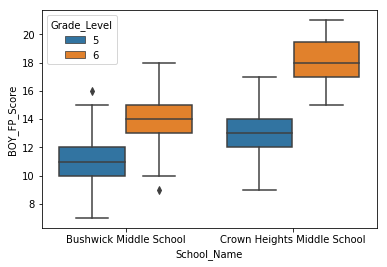

In [117]:
sns.boxplot(x="School_Name", y="BOY_FP_Score", hue="Grade_Level", data=df2);

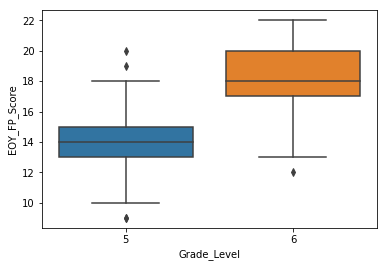

In [119]:
ax = sns.boxplot(x="Grade_Level", y="EOY_FP_Score", data=df2)

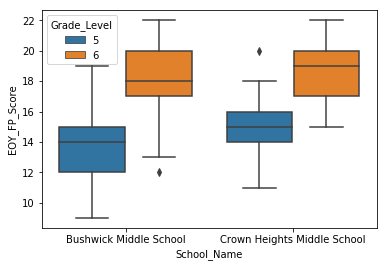

In [118]:
sns.boxplot(x="School_Name", y="EOY_FP_Score", hue="Grade_Level", data=df2);

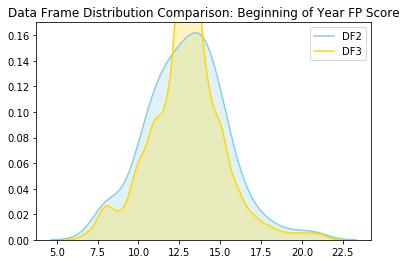

In [114]:
p1=sns.kdeplot(df2['BOY_FP_Score'], shade=True, color="skyblue", label='DF2')
p1=sns.kdeplot(df3['BOY_FP_Score'], shade=True, color="gold",label='DF3')
plt.title('Data Frame Distribution Comparison: Beginning of Year FP Score');

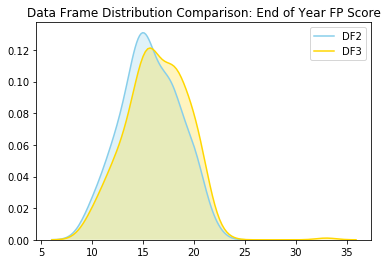

In [115]:
p1=sns.kdeplot(df2['EOY_FP_Score'], shade=True, color="skyblue", label='DF2')
p1=sns.kdeplot(df3['EOY_FP_Score'], shade=True, color="gold",label='DF3')
plt.title('Data Frame Distribution Comparison: End of Year FP Score');

## Data Frame 2 Subsets

In [16]:
crown_heights = df2[df2['School_Name']== 'Crown Heights Middle School']
crown_heights.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
2,10000003,Crown Heights Middle School,5,11.0,Below Proficient,16.0,Advanced
7,10000008,Crown Heights Middle School,5,13.0,Proficient,14.0,Proficient
8,10000009,Crown Heights Middle School,5,13.0,Proficient,11.0,Remedial
9,10000010,Crown Heights Middle School,5,14.0,Advanced,15.0,Proficient
10,10000011,Crown Heights Middle School,5,13.0,Proficient,14.0,Proficient


In [152]:
crown_heights_5 = crown_heights[crown_heights['Grade_Level']== 5]
crown_heights_5.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
2,10000003,Crown Heights Middle School,5,11.0,Below Proficient,16.0,Advanced
7,10000008,Crown Heights Middle School,5,13.0,Proficient,14.0,Proficient
8,10000009,Crown Heights Middle School,5,13.0,Proficient,11.0,Remedial
9,10000010,Crown Heights Middle School,5,14.0,Advanced,15.0,Proficient
10,10000011,Crown Heights Middle School,5,13.0,Proficient,14.0,Proficient


In [153]:
crown_heights_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 2 to 238
Data columns (total 7 columns):
Student ID      73 non-null int64
School_Name     73 non-null object
Grade_Level     73 non-null int64
BOY_FP_Score    73 non-null float64
BOY             73 non-null object
EOY_FP_Score    73 non-null float64
EOY             73 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 4.6+ KB


In [18]:
crown_heights_6 = crown_heights[crown_heights['Grade_Level']== 6]
crown_heights_6.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
169,10000170,Crown Heights Middle School,6,15.0,Proficient,22.0,Advanced
186,10000187,Crown Heights Middle School,6,20.0,Advanced,15.0,Below Proficient
232,10000233,Crown Heights Middle School,6,19.0,Advanced,20.0,Advanced
248,10000249,Crown Heights Middle School,6,19.0,Advanced,20.0,Advanced
253,10000254,Crown Heights Middle School,6,20.0,Advanced,19.0,Advanced


In [36]:
crown_heights_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 169 to 369
Data columns (total 7 columns):
Student ID      15 non-null int64
School_Name     15 non-null object
Grade_Level     15 non-null int64
BOY_FP_Score    15 non-null float64
BOY             15 non-null object
EOY_FP_Score    15 non-null float64
EOY             15 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 960.0+ bytes


In [26]:
bushwick = df2[df2['School_Name'] == 'Bushwick Middle School']
bushwick.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
0,10000001,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
1,10000002,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
3,10000004,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
4,10000005,Bushwick Middle School,5,11.0,Below Proficient,14.0,Proficient
5,10000006,Bushwick Middle School,5,11.0,Below Proficient,10.0,Remedial


In [27]:
bushwick_5 = bushwick[bushwick['Grade_Level'] == 5]
bushwick_5.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
0,10000001,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
1,10000002,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
3,10000004,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
4,10000005,Bushwick Middle School,5,11.0,Below Proficient,14.0,Proficient
5,10000006,Bushwick Middle School,5,11.0,Below Proficient,10.0,Remedial


In [30]:
bushwick_6 = bushwick[bushwick['Grade_Level'] == 6]
bushwick_6.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
124,10000125,Bushwick Middle School,6,15.0,Proficient,19.0,Advanced
132,10000133,Bushwick Middle School,6,12.0,Below Proficient,18.0,Advanced
134,10000135,Bushwick Middle School,6,17.0,Advanced,20.0,Advanced
135,10000136,Bushwick Middle School,6,12.0,Below Proficient,21.0,Advanced
136,10000137,Bushwick Middle School,6,11.0,Remedial,17.0,Proficient


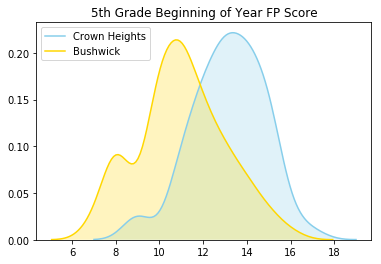

In [111]:
p1=sns.kdeplot(crown_heights_5['BOY_FP_Score'], shade=True, color="skyblue", label='Crown Heights')
p1=sns.kdeplot(bushwick_5['BOY_FP_Score'], shade=True, color="gold",label='Bushwick')
plt.title('5th Grade Beginning of Year FP Score');

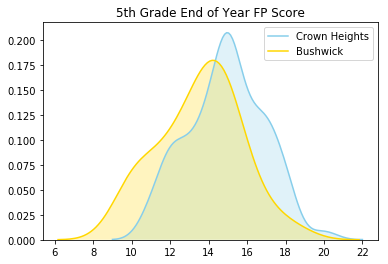

In [112]:
p1=sns.kdeplot(crown_heights_5['EOY_FP_Score'], shade=True, color="skyblue", label='Crown Heights')
p1=sns.kdeplot(bushwick_5['EOY_FP_Score'], shade=True, color="gold",label='Bushwick')
plt.title('5th Grade End of Year FP Score');

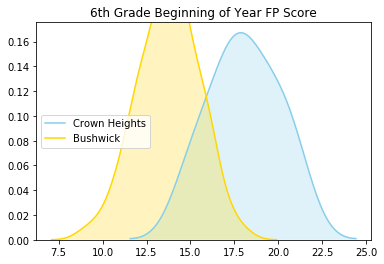

In [110]:
p1=sns.kdeplot(crown_heights_6['BOY_FP_Score'], shade=True, color="skyblue", label='Crown Heights')
p1=sns.kdeplot(bushwick_6['BOY_FP_Score'], shade=True, color="gold",label='Bushwick')
plt.title('6th Grade Beginning of Year FP Score');


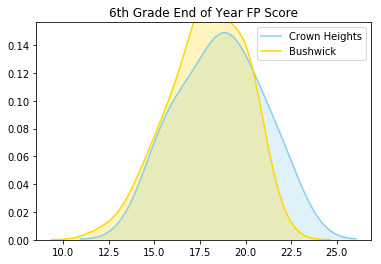

In [109]:
p1=sns.kdeplot(crown_heights_6['EOY_FP_Score'], shade=True, color="skyblue", label='Crown Heights')
p1=sns.kdeplot(bushwick_6['EOY_FP_Score'], shade=True, color="gold",label='Bushwick')
plt.title('6th Grade End of Year FP Score');


In [ ]:
crown_heights_5 = crown_heights[crown_heights['Grade_Level']== 5]
crown_heights_5.head()

In [ ]:
dfwomen_1824 = dfwomen_users[(dfwomen_users.age==18) & (dfwomen_users.age<=24)]
ch_5_BOYadvanced = crown_heights_5[(crown_heights_5>=14)]
ch_5_BOYproficient = crown_heights_5[(crown_heights_5>=12) & (crown_heights_5<=14)]

In [185]:
ch_5_BOYadvanced = crown_heights_5[(crown_heights_5.BOY_FP_Score>=14)]
ch_5_BOYproficient = crown_heights_5[(crown_heights_5.BOY_FP_Score>=12) & (crown_heights_5.BOY_FP_Score<=13)]
ch_5_BOYbelow_proficient = crown_heights_5[(crown_heights_5.BOY_FP_Score>=10) & (crown_heights_5.BOY_FP_Score<=11)]
ch_5_BOYremedial = crown_heights_5[(crown_heights_5.BOY_FP_Score<=9)]


In [186]:
bw_5_BOYadvanced = bushwick_5[(bushwick_5.BOY_FP_Score>=14)]
bw_5_BOYproficient = bushwick_5[(bushwick_5.BOY_FP_Score>=12) & (bushwick_5.BOY_FP_Score<=13)]
bw_5_BOYbelow_proficient = bushwick_5[(bushwick_5.BOY_FP_Score>=10) & (bushwick_5.BOY_FP_Score<=11)]
bw_5_BOYremedial = bushwick_5[(bushwick_5.BOY_FP_Score<=9)]

In [187]:
ch_6_BOYadvanced = crown_heights_6[(crown_heights_6.BOY_FP_Score>=16)]
ch_6_BOYproficient = crown_heights_6[(crown_heights_6.BOY_FP_Score>=14) & (crown_heights_6.BOY_FP_Score<=15)]
ch_6_BOYbelow_proficient = crown_heights_6[(crown_heights_6.BOY_FP_Score>=12) & (crown_heights_6.BOY_FP_Score<=13)]
ch_6_BOYremedial = crown_heights_6[(crown_heights_6.BOY_FP_Score<=11)]

In [188]:
bw_6_BOYadvanced = bushwick_6[(bushwick_6.BOY_FP_Score>=16)]
bw_6_BOYproficient = bushwick_6[(bushwick_6.BOY_FP_Score>=14) & (bushwick_6.BOY_FP_Score<=15)]
bw_6_BOYbelow_proficient = bushwick_6[(bushwick_6.BOY_FP_Score>=12) & (bushwick_6.BOY_FP_Score<=13)]
bw_6_BOYremedial = bushwick_6[(bushwick_6.BOY_FP_Score<=11)]

In [189]:
ch_5_EOYadvanced = crown_heights_5[(crown_heights_5.EOY_FP_Score>=16)]
ch_5_EOYproficient = crown_heights_5[(crown_heights_5.EOY_FP_Score>=14) & (crown_heights_5.EOY_FP_Score<=15)]
ch_5_EOYbelow_proficient = crown_heights_5[(crown_heights_5.EOY_FP_Score>=12) & (crown_heights_5.EOY_FP_Score<=13)]
ch_5_EOYremedial = crown_heights_5[(crown_heights_5.EOY_FP_Score<=11)]


In [190]:
bw_5_EOYadvanced = bushwick_5[(bushwick_5.EOY_FP_Score>=16)]
bw_5_EOYproficient = bushwick_5[(bushwick_5.EOY_FP_Score>=14) & (bushwick_5.EOY_FP_Score<=15)]
bw_5_EOYbelow_proficient = bushwick_5[(bushwick_5.EOY_FP_Score>=12) & (bushwick_5.EOY_FP_Score<=13)]
bw_5_EOYremedial = bushwick_5[(bushwick_5.EOY_FP_Score<=11)]

In [191]:
ch_6_EOYadvanced = crown_heights_6[(crown_heights_6.EOY_FP_Score>=18)]
ch_6_EOYproficient = crown_heights_6[(crown_heights_6.EOY_FP_Score>=16) & (crown_heights_6.EOY_FP_Score<=17)]
ch_6_EOYbelow_proficient = crown_heights_6[(crown_heights_6.EOY_FP_Score>=14) & (crown_heights_6.EOY_FP_Score<=15)]
ch_6_EOYremedial = crown_heights_6[(crown_heights_6.EOY_FP_Score<=13)]

In [192]:
bw_6_EOYadvanced = bushwick_6[(bushwick_6.EOY_FP_Score>=18)]
bw_6_EOYproficient = bushwick_6[(bushwick_6.EOY_FP_Score>=16) & (bushwick_6.EOY_FP_Score<=17)]
bw_6_EOYbelow_proficient = bushwick_6[(bushwick_6.EOY_FP_Score>=14) & (bushwick_6.EOY_FP_Score<=15)]
bw_6_EOYremedial = bushwick_6[(bushwick_6.EOY_FP_Score<=13)]

In [201]:
bw_5_BOYbelow_proficient.head()

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
0,10000001,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
1,10000002,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
3,10000004,Bushwick Middle School,5,11.0,Below Proficient,16.0,Advanced
4,10000005,Bushwick Middle School,5,11.0,Below Proficient,14.0,Proficient
5,10000006,Bushwick Middle School,5,11.0,Below Proficient,10.0,Remedial


# DATA FRAME 3 (WITH IMPUTATION)

In [142]:
df3 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT4MV-jCI7JZ5glq5YmcLCNs0lrQKb-Nyr63LPmXV9BFpXKsx3JJTx4oa5unSB4tZMwO-UCaG65x96Z/pub?output=csv")

In [139]:
df3 = df3.rename(columns={'BOY F&P Score':'BOY_FP_Score', 'EOY F&P Score':'EOY_FP_Score', 'Grade Level':'Grade_Level', 'School Name':'School_Name'})

In [126]:
df3.describe(include='all')

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
count,3.760000e+02,376,376.000000,279.000000,278,366.000000,366
unique,NaN,2,NaN,NaN,4,NaN,4
top,NaN,Bushwick Middle School,NaN,NaN,Proficient,NaN,Advanced
freq,NaN,202,NaN,NaN,96,NaN,177
mean,1.000019e+07,NaN,5.529255,12.867384,NaN,16.390710,NaN
std,1.083334e+02,NaN,0.499808,2.572750,NaN,3.057946,NaN
min,1.000000e+07,NaN,5.000000,0.000000,NaN,9.000000,NaN
25%,1.000009e+07,NaN,5.000000,11.000000,NaN,14.000000,NaN
50%,1.000019e+07,NaN,6.000000,13.000000,NaN,16.000000,NaN
75%,1.000028e+07,NaN,6.000000,14.000000,NaN,19.000000,NaN


In [127]:
df3.isnull().sum()

Student ID       0
School_Name      0
Grade_Level      0
BOY_FP_Score    97
BOY             98
EOY_FP_Score    10
EOY             10
dtype: int64

## Mean imputatation is used to fill in the missing values.

In [55]:
df3 = df3.fillna(df3.mean(),inplace=True)
df3.describe(include="all")

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
count,3.760000e+02,376,376.000000,376.000000,278,376.000000,366
unique,NaN,2,NaN,NaN,4,NaN,4
top,NaN,Bushwick Middle School,NaN,NaN,Proficient,NaN,Advanced
freq,NaN,202,NaN,NaN,96,NaN,177
mean,1.000019e+07,NaN,5.529255,12.867384,NaN,16.390710,NaN
std,1.083334e+02,NaN,0.499808,2.215156,NaN,3.016898,NaN
min,1.000000e+07,NaN,5.000000,0.000000,NaN,9.000000,NaN
25%,1.000009e+07,NaN,5.000000,12.000000,NaN,14.000000,NaN
50%,1.000019e+07,NaN,6.000000,12.867384,NaN,16.390710,NaN
75%,1.000028e+07,NaN,6.000000,14.000000,NaN,19.000000,NaN


In [140]:
df3 = df3.fillna(df3.groupby('Grade_Level')['BOY_FP_Score'].mean().reset_index(),inplace=True)
df3.describe(include="all")

AttributeError: 'NoneType' object has no attribute 'describe'

In [143]:
df3.isnull().sum()

Student ID        0
School Name       0
Grade Level       0
BOY F&P Score    97
BOY              98
EOY F&P Score    10
EOY              10
dtype: int64

In [135]:
df3.groupby('Grade_Level')['BOY_FP_Score'].mean()

AttributeError: 'NoneType' object has no attribute 'groupby'

In [56]:
df3.shape

(376, 7)

# The data set is exported to Excel to index match proficiecy levels. 

In [49]:
df3.to_csv('out.csv')

In [58]:
df3 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSCur0dahlDU__uPWFnN5xw2JErlJzRcr_jiGX-8o9MDnNS76bvgcKiHQQQD42E3pasXxbbFwd-_UaI/pub?output=csv")

In [63]:
df3 = df3.rename(columns={'BOY F&P Score':'BOY_FP_Score', 'EOY F&P Score':'EOY_FP_Score', 'Grade Level':'Grade_Level', 'School Name':'School_Name'})

In [64]:
df3.head(45)

,Student ID,School_Name,Grade_Level,BOY_FP_Score,BOY,EOY_FP_Score,EOY
0,10000001,Bushwick Middle School,5,11,Below Proficient,16,Advanced
1,10000002,Bushwick Middle School,5,11,Below Proficient,16,Advanced
2,10000003,Crown Heights Middle School,5,11,Below Proficient,16,Advanced
3,10000004,Bushwick Middle School,5,11,Below Proficient,16,Advanced
4,10000005,Bushwick Middle School,5,11,Below Proficient,14,Proficient
5,10000006,Bushwick Middle School,5,11,Below Proficient,10,Remedial
6,10000007,Bushwick Middle School,5,8,Remedial,14,Proficient
7,10000008,Crown Heights Middle School,5,13,Proficient,14,Proficient
8,10000009,Crown Heights Middle School,5,13,Proficient,11,Remedial
9,10000010,Crown Heights Middle School,5,14,Advanced,15,Proficient


In [60]:
df3.isnull().sum()

Student ID       0
School Name      0
Grade Level      0
BOY F&P Score    0
BOY              0
EOY F&P Score    0
EOY              0
dtype: int64

In [69]:
df3.describe()

,Student ID,Grade_Level,BOY_FP_Score,EOY_FP_Score
count,3.760000e+02,376.000000,376.000000,376.000000
mean,1.000019e+07,5.529255,12.936170,16.380319
std,1.083334e+02,0.499808,2.113113,3.017555
min,1.000000e+07,5.000000,7.000000,9.000000
25%,1.000009e+07,5.000000,12.000000,14.000000
50%,1.000019e+07,6.000000,13.000000,16.000000
75%,1.000028e+07,6.000000,14.000000,19.000000
max,1.000038e+07,6.000000,21.000000,33.000000


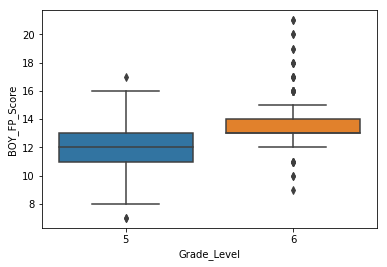

In [73]:
ax = sns.boxplot(x="Grade_Level", y="BOY_FP_Score", data=df3)

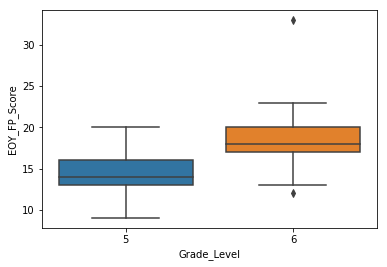

In [74]:
ax = sns.boxplot(x="Grade_Level", y="EOY_FP_Score", data=df3)

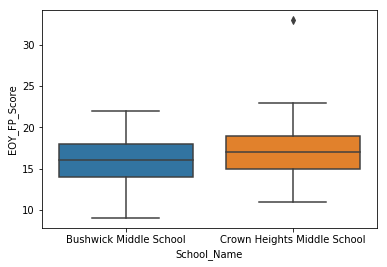

In [75]:
ax = sns.boxplot(x="School_Name", y="EOY_FP_Score", data=df3)

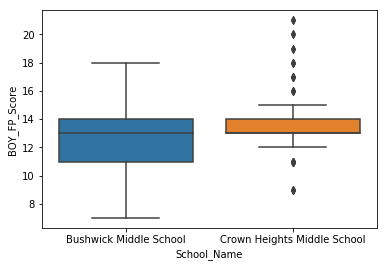

In [76]:
ax = sns.boxplot(x="School_Name", y="BOY_FP_Score", data=df3)

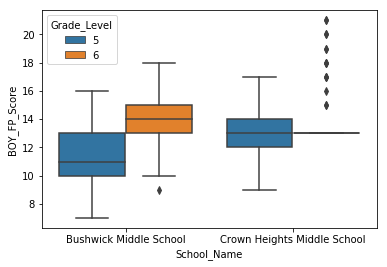

In [84]:
sns.boxplot(x="School_Name", y="BOY_FP_Score", hue="Grade_Level", data=df3);

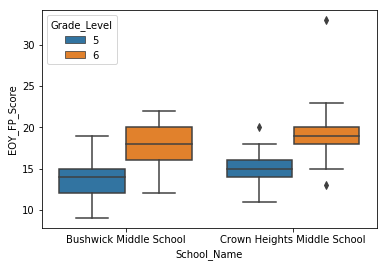

In [85]:
sns.boxplot(x="School_Name", y="EOY_FP_Score", hue="Grade_Level", data=df3);

In [ ]:
df[['a', 'b']] = df[['a','b']].fillna(value=0)
bushwick_6 = bushwick[bushwick['Grade_Level'] == 6]

women_users = sub1[sub1["sex"] == "f"]
male_users = sub1[sub1["sex"]== "m"]

women_1824 = women_users[(women_users.age==18) & (women_users.age<=24)]

def get_rid_of_nulls(value):
     if value == np.nan:
        return 'Is Null value'
     else:
        return value
    
    fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
conditions = [
    (df['Set'] == 'Z') & (df['Type'] == 'A'),
    (df['Set'] == 'Z') & (df['Type'] == 'B'),
    (df['Type'] == 'B')]
choices = ['yellow', 'blue', 'purple']
df['color'] = np.select(conditions, choices, default='black')
print(df)

t2.set_index('letters',inplace=True)
t2_map = t2.target.to_dict()
{'a': 'ddd', 'b': 'eee', 'c': 'fff'}
t1['target']=t1.letters.map(t2_map)
t1

      numbers letters target
0     1623       a    ddd
1     3266       b    eee
2     3672       c    fff

In [ ]:
boy_list = ['Remedial','Below Proficient','Proficient','Advanced']
conditions 
df fill_BOY(value): 
    if value 

In [ ]:
df3 = pd.df3({'BOY_FP_Score':list('123456789'),'Grade_Level':list('5')})
df3

In [ ]:
df3[['BOY']] = df3[['BOY']].fillna(value=)

In [113]:
df3 = df3.replace(' ',np.NaN)

In [162]:
df3 = df3.fillna(df3.mean(),inplace=True)

In [175]:
df3.count()

Student ID      376
School_Name     376
Grade_Level     376
BOY_FP_Score    376
BOY             278
EOY_FP_Score    376
EOY             366
dtype: int64

In [181]:
df.isnull().sum()

Student ID       0
School_Name      0
Grade_Level      0
BOY_FP_Score     0
BOY             98
EOY_FP_Score     0
EOY             10
dtype: int64

In [39]:
df3.BOY_FP_Score.value_counts()

12.867384    97
14.000000    48
13.000000    45
12.000000    41
11.000000    35
15.000000    34
10.000000    23
16.000000    15
8.000000     11
17.000000     7
9.000000      7
18.000000     4
7.000000      2
21.000000     2
20.000000     2
19.000000     2
0.000000      1
Name: BOY_FP_Score, dtype: int64

In [42]:
df.BOY_FP_Score.value_counts()

14.0    48
13.0    45
12.0    41
11.0    35
15.0    34
10.0    23
16.0    15
8.0     11
17.0     7
9.0      7
18.0     4
21.0     2
19.0     2
20.0     2
7.0      2
0.0      1
Name: BOY_FP_Score, dtype: int64

In [ ]:
rename column and remove & 
create 3 data frame 

import the ollowing 

from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm 

%matplotlib inline 

remember 
df.info
df.decribe
df.hape
df.column
df.head
df.inull().um()
df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

df[['a', 'b']] = df[['a','b']].fillna(value=0) Use this to replace just certain columns null values



Assuming that the three columns in your dataframe are a, b and c. Then you can do the required operation like this:

values = df['a'] * df['b']
df['c'] = values.where(df['c'] == np.nan, others=df['c'])


def get_rid_of_nulls(value):
     if value == np.nan:
        return 'Is Null value'
     else:
        return value

    
    df3 = df3.replace(' ',np.NaN)